In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
print(df.shape)

(6362620, 11)


- the total number of rows in the column is 6362620

In [5]:
print(len(df.columns))
print(list(df.columns))

11
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


- There are a total of 11 columns in the dataset.
- With the column 'isFraud' as the target variable


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


##  Percentage of missing values 

In [7]:
# returns the percentage of non missing values in each column
df_missing = df.count()/len(df)

In [8]:
df_missing = (1-df_missing)*100
df_missing.sort_values(ascending=False)

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [9]:
df_missing_1 = df.isna().mean().round(4)*100
df_missing_1

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

- the dataset has no missing values for any column

## EDA

### Handling Missing values

### 1. 'step' Column

In [10]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

<AxesSubplot:ylabel='Frequency'>

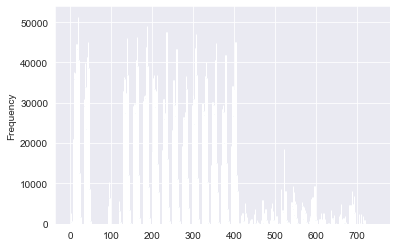

In [11]:
num_uniq_values = len(df.step.unique())
df['step'].plot.hist(bins=num_uniq_values)

- The step column has values ranging from 0-800.
- The values like combination of two nornal distribution.

### 2. 'type' Column

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PAYMENT'),
  Text(1, 0, 'TRANSFER'),
  Text(2, 0, 'CASH_OUT'),
  Text(3, 0, 'DEBIT'),
  Text(4, 0, 'CASH_IN')])

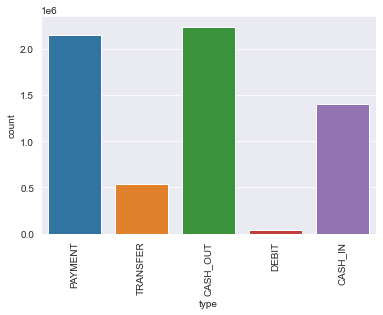

In [12]:
sns.countplot(x="type",data=df)
plt.xticks(rotation=90)

- CASH_OUT has the highest number of frequency in the dataset. While DEBIT has the lowest frequency.

### 3. 'amount' Column

In [13]:
df.amount.value_counts()

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: amount, Length: 5316900, dtype: int64

<AxesSubplot:xlabel='amount'>

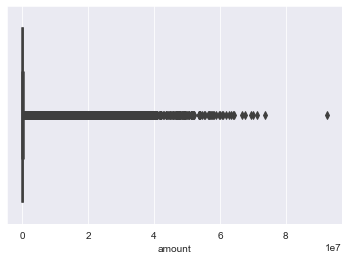

In [14]:
sns.boxplot(x=df['amount'])

- the values range from 0-8*10^7

### 4. 'oldbalanceOrg' Column

In [15]:
df.oldbalanceOrg.value_counts()

0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
34577.49           1
184929.21          1
29320.33           1
82645.19           1
641239.85          1
Name: oldbalanceOrg, Length: 1845844, dtype: int64

<AxesSubplot:xlabel='oldbalanceOrg'>

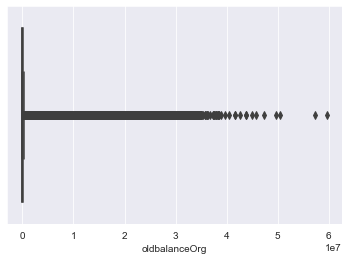

In [16]:
sns.boxplot(x=df['oldbalanceOrg'])

### 5. 'newbalanceOrig' Column

In [17]:
df.newbalanceOrig.value_counts()

0.00         3609566
5888.64            4
15073.44           4
5122.00            4
36875.73           4
              ...   
51345.64           1
46527.23           1
30839.51           1
25521.75           1
160296.36          1
Name: newbalanceOrig, Length: 2682586, dtype: int64

<AxesSubplot:xlabel='newbalanceOrig'>

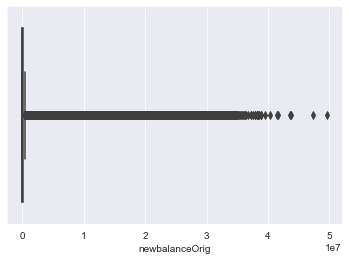

In [18]:
sns.boxplot(x=df['newbalanceOrig'])

### 6. 'oldbalanceDest' Column

In [19]:
df['oldbalanceDest'].value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
967022.27            1
327279.67            1
2039554.04           1
587552.25            1
6510099.11           1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [20]:
df['oldbalanceDest'].describe()

count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

<AxesSubplot:xlabel='oldbalanceDest'>

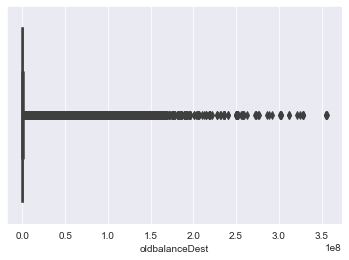

In [21]:
sns.boxplot(x=df['oldbalanceDest'])

- The number of 0.0 is unusally high for merchants. It would be better to convert it to null so as to have a better model.building
- Converting all those values of oldBalanceDest which belong to merchants to null, will not affect the model process.

In [22]:
df["oldbalanceDest"].value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
967022.27            1
327279.67            1
2039554.04           1
587552.25            1
6510099.11           1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 6. newbalanceDest

In [24]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: newbalanceDest, Length: 3555499, dtype: int64

<AxesSubplot:xlabel='newbalanceDest'>

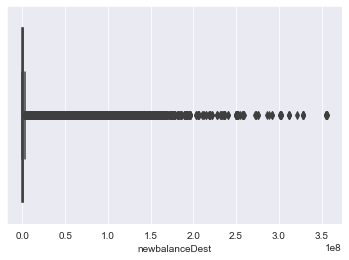

In [25]:
sns.boxplot(x=df['newbalanceDest'])

In [26]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: newbalanceDest, Length: 3555499, dtype: int64

### Outlier Handling

#### Checking the presence of outliers in the numerical columns

In [27]:
numerical_columns = df.select_dtypes(include='number')
categorical_columns = df.select_dtypes(include='category')

In [28]:
numerical_columns

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


- There are no categorical columns in the dataset

In [29]:
num_cols = list(numerical_columns.columns)

In [30]:
num_cols

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

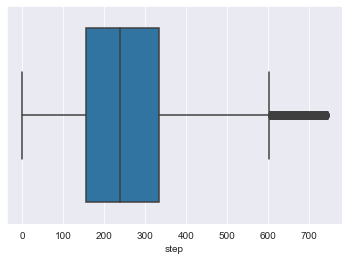

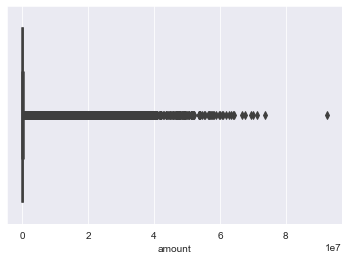

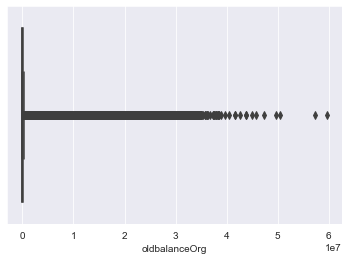

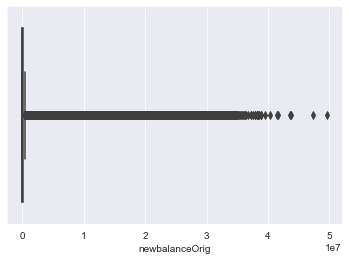

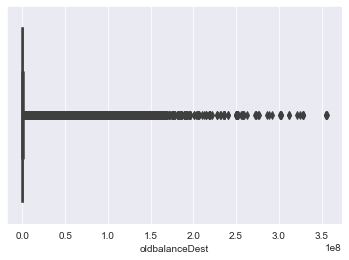

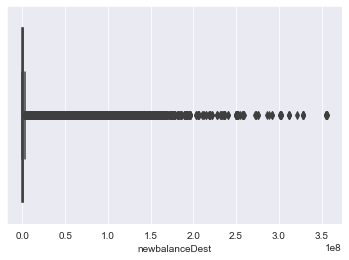

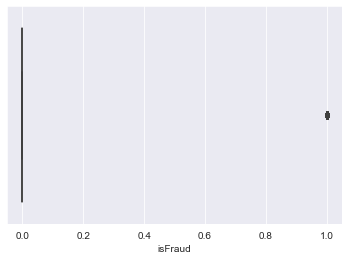

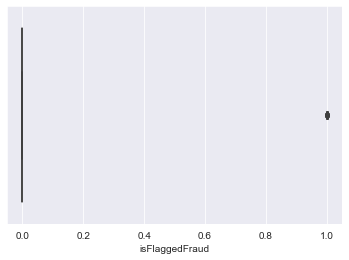

In [31]:
for i,col in enumerate(numerical_columns.columns):
    plt.figure(i)
    sns.boxplot(x=col,data=df)

- There are presence of outliers in the following numerical columns
    - amount
    - oldbalanceOrg
    - newbalanceOrig
    - oldbalanceDest
    - newbalanceDest
    

#### Removing the outliers based from boxplot from the numerical columns

In [32]:
df = df.loc[~(df["amount"]>80000000)]

In [33]:
df = df.loc[~(df["oldbalanceOrg"]>4.7*10**7)]

In [34]:
df.shape

(6362614, 11)

In [35]:
df = df.loc[~(df["newbalanceOrig"]>4.3*10**7)]

In [36]:
df.shape

(6362612, 11)

In [37]:
df = df.loc[~(df["oldbalanceDest"]>3.5*10**8)]

In [38]:
df.shape


(6362607, 11)

In [39]:
df = df.loc[~(df["newbalanceDest"]>3.5*10**8)]

In [40]:
df.shape

(6362605, 11)

In [41]:
df.shape

(6362605, 11)

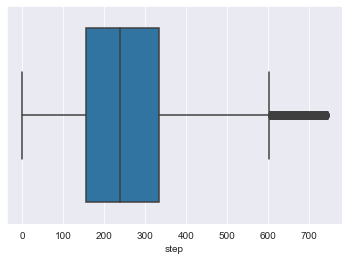

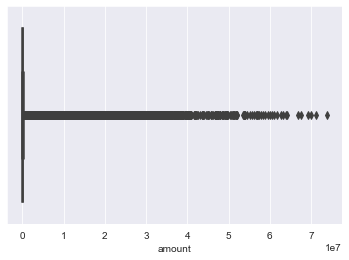

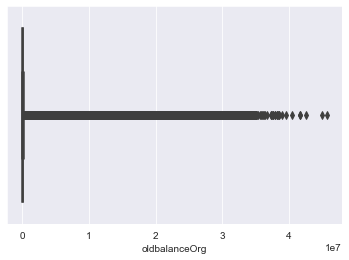

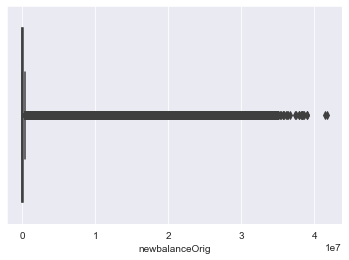

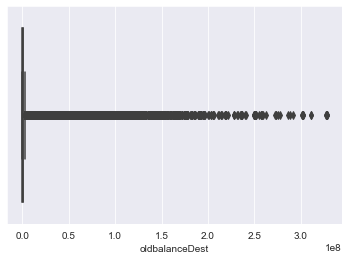

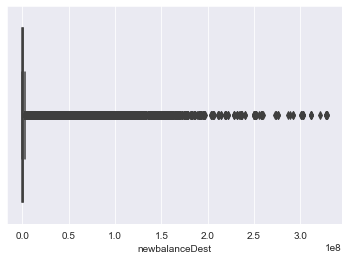

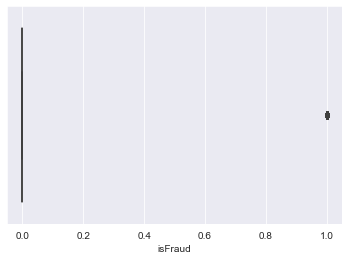

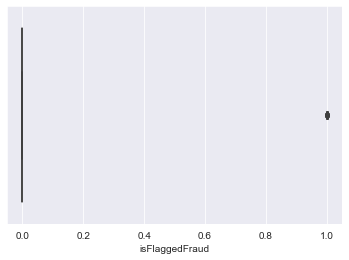

In [42]:
for i,col in enumerate(numerical_columns.columns):
    plt.figure(i)
    sns.boxplot(x=col,data=df)

In [43]:
df.groupby(['type']).mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,244.489971,168920.220537,3.590466e+06,3.759381e+06,1.587413e+06,1.466600e+06,0.000000,0.00000
CASH_OUT,240.900573,176273.981440,4.600428e+04,1.745469e+04,1.497440e+06,1.691008e+06,0.001840,0.00000
DEBIT,248.440481,5483.665314,6.864734e+04,6.516165e+04,1.493136e+06,1.513003e+06,0.000000,0.00000
PAYMENT,244.378151,13057.604773,6.819655e+04,6.181762e+04,0.000000e+00,0.000000e+00,0.000000,0.00000
TRANSFER,246.653558,910330.160859,5.394699e+04,9.886376e+03,2.565769e+06,3.552451e+06,0.007679,0.00003


- We see that maximum fraud is in the TRANSFER type category, followed by CASH_OUT type category 

### Target Variable

#### isFraud is the target variable in the dataset

In [44]:
(df['isFraud']==0).sum()

6354397

In [45]:
(df['isFraud']==1).sum()

8208

In [46]:
df['isFraud'].count()

6362605

In [47]:
#ratio of the variables
(((df['isFraud']==0).sum())/((df['isFraud']==1).sum())).sum()

774.1711744639376

- we see that the dataset is too much imbalanbced

### Analysing Categorical Data

Since due to data imbalance, we will separate out the df with a isFraud equal to 0 and df with a isFraud equal to 1. And we will analyse them individually and try to find any relationship if it exists.

In [48]:
df_0=df.loc[df['isFraud']==0]
df_1=df.loc[df['isFraud']==1]

Text(0.5, 1.0, 'Plotting data for isFraud in terms of percentage')

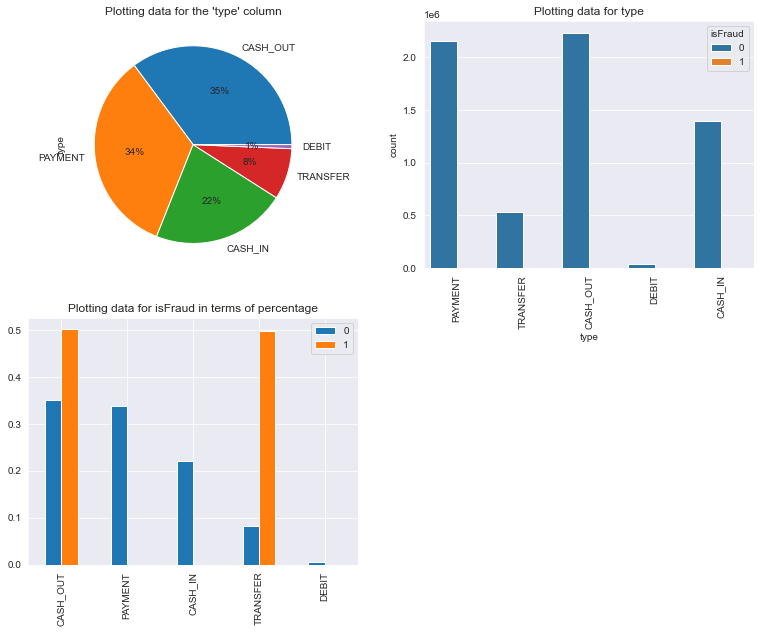

In [49]:
fig = plt.figure(figsize=(13,10))

ax1 = plt.subplot(221)
df['type'].value_counts().plot.pie(autopct = "%1.0f%%",ax=ax1)
plt.title('Plotting data for the \'type\' column')

ax2 = plt.subplot(222)
sns.countplot(x= 'type', hue = 'isFraud', data = df, ax = ax2)
plt.xticks(rotation=90)
plt.title('Plotting data for type')


ax3 = plt.subplot(223)
df_temp = pd.DataFrame()
df_temp['0']= ((df_0['type'].value_counts())/len(df_0))
df_temp['1']= ((df_1['type'].value_counts())/len(df_1))
df_temp.plot.bar(ax=ax3)
plt.title('Plotting data for isFraud in terms of percentage')

In [50]:
df_fraud = df[df['isFraud']==1]
df_not_fraud = df[df['isFraud']==0]

In [51]:
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


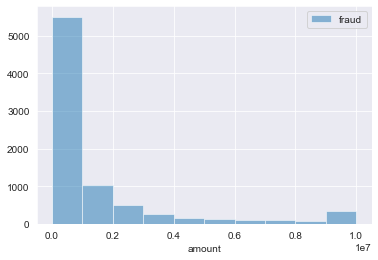

In [52]:
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.xlabel('amount')
plt.legend()
plt.show()

- We see that most fraud transactions occur in the range of having amount (0-0.2)*10**7  

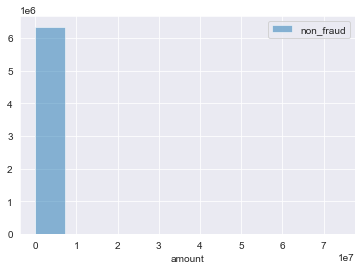

In [53]:
plt.hist(df_not_fraud.amount, alpha=0.5, label='non_fraud')
plt.xlabel('amount')
plt.legend()
plt.show()

- most non fraud transactions arer in the range having amount 0 to 10000000

In [54]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Handling Multicollinearity issues between Variables

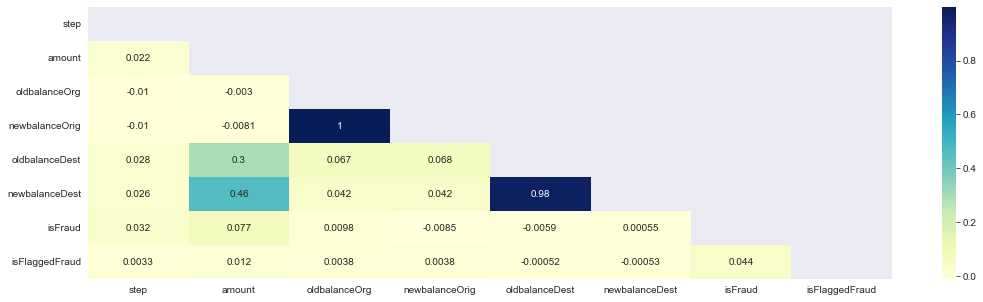

In [55]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),mask=mask , annot=True,cmap='YlGnBu')
plt.show()

- we see that oldbalanceOrg and newBalanceOrig are highly correlated. Similarly, oldBalanceDest and newbalanceDest is highly correlated. Dropping one from each two will handle multicollinearity issue.


In [56]:
df = df.drop(['oldbalanceDest','oldbalanceOrg'],axis=1)

- now we see that newbalancedest and amount are correlated. As amount has better business use. Dropping the newbalance column

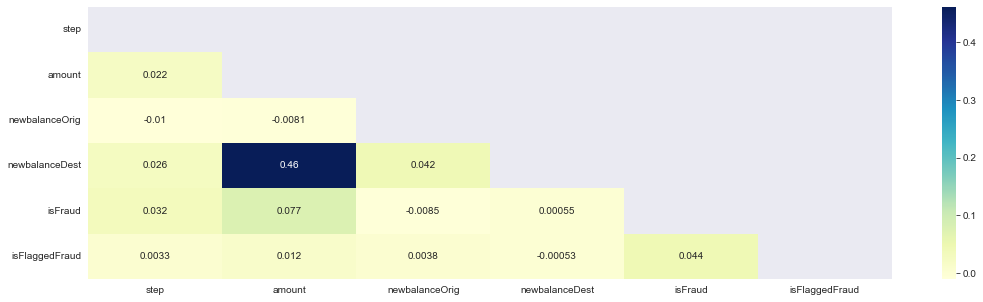

In [57]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),mask=mask , annot=True,cmap='YlGnBu')
plt.show()

- So we are left with variables which have very less degree of correlation between eachother.

In [58]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0


### Feature Engineering

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [60]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,160296.36,1662090,0.0,0,0
1,1,3,1864.28,2188995,19384.72,1733920,0.0,0,0
2,1,4,181.00,1002156,0.00,439681,0.0,1,0
3,1,1,181.00,5828247,0.00,391692,0.0,1,0
4,1,3,11668.14,3445975,29885.86,828915,0.0,0,0


### Splitting the Dataset into X and y

In [61]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

In [62]:
y.value_counts()

0    6354397
1       8208
Name: isFraud, dtype: int64

**As the dataset is heavily imbalanced we use SMOTE**

In [63]:
!pip install -U imbalanced-learn

In [64]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state = 0)
X,y = over_sample.fit_resample(X,y)


In [65]:
y.value_counts()

0    6354397
1    6354397
Name: isFraud, dtype: int64

- the data is balanced right now.
- the number of 0 and 1 is same.

### Feature Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 3. Model building

### Test-Train Split

In [78]:
from sklearn.model_selection import train_test_split


In [79]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

### Applying Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logreg = LogisticRegression()

In [82]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [83]:
y_pred = logreg.predict(X_test)

### Check Performance of The Model

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [85]:
confusion_matrix(y_test,y_pred)

array([[1594266,  311755],
       [ 332139, 1574479]], dtype=int64)

In [86]:
accuracy_score(y_test,y_pred)

0.8311159278389588

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83   1906021
           1       0.83      0.83      0.83   1906618

    accuracy                           0.83   3812639
   macro avg       0.83      0.83      0.83   3812639
weighted avg       0.83      0.83      0.83   3812639



### Check Accuracy using cross val score

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
cvs = cross_val_score(logreg,X,y,cv=3)

In [90]:
print(cvs)
print(cvs.mean())

[0.85326603 0.84425266 0.65378433]
0.7837676706394529


This is a situation of underfit where cross val score is less than than predicting score

### Feature Selection for the model

In [91]:
from sklearn.feature_selection import chi2,SelectKBest

In [93]:
chi_best_col = SelectKBest(chi2,k=6)
kbest = chi_best_col.fit_transform(X,y)
np.array(df.drop(columns = ['isFraud']).columns)[chi_best_col.get_support()]

array(['step', 'type', 'amount', 'newbalanceOrig', 'nameDest',
       'isFlaggedFraud'], dtype=object)

In [95]:
pd.DataFrame(list(zip(df.drop(columns=['isFraud']).columns,chi_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
5,nameDest,474976.072107
1,type,222790.122648
0,step,220595.828446
2,amount,86617.898959
4,newbalanceOrig,71507.531439
7,isFlaggedFraud,5715.000000
3,nameOrig,100.418761
6,newbalanceDest,9.801820


### Applying Logistic Regression using 5 important features

In [96]:
x1 = df[['step','type','nameOrig','newbalanceOrig','nameDest']]
y1 = df['isFraud']

In [97]:
X1_train , X1_test , y1_train , y1_test = train_test_split(x1,y1,test_size=0.30,random_state=0)

### Applying Logistic regression

In [98]:
logreg1 = LogisticRegression()
logreg1.fit(X1_train,y1_train)
y2_pred = logreg1.predict(X1_test)
print(classification_report(y1_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906315
           1       0.00      0.00      0.00      2467

    accuracy                           1.00   1908782
   macro avg       0.50      0.50      0.50   1908782
weighted avg       1.00      1.00      1.00   1908782



In [100]:
from sklearn.model_selection import cross_val_score
cvs1 = cross_val_score(logreg1,x1,y1,cv=3)
print(cvs1)
print(cvs1.mean())

[0.99870996 0.99870996 0.99870996]
0.9987099623503265


### Our model accuracy is 99% and model is complete